In [2]:
import os
import pandas as pd
import numpy as np

folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\original_processed' 
file_path_1 = os.path.join(folder_path, 'S1_scaled.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去

# folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\original_processed' 
# file_path_1 = os.path.join(folder_path, 'S2_scaled.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去

# folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\matminner_processed' 
# file_path_1 = os.path.join(folder_path, 's2_data.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去

# folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\matminner_processed'  
# file_path_1 = os.path.join(folder_path, 'Ti.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去

# folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\matminner_processed\virtual_ti'  
# file_path_1 = os.path.join(folder_path, 'Virtual.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去

df = pd.read_excel(file_path_1)

# Ti  Virtual_ti  s1_data  s1+s2_data
# df = pd.read_excel(file_path)

print(df.shape)

Y_all = df.iloc[:, -1].values  

y_min = np.nanmax(Y_all)
# y_min = np.exp(y_min)
print(y_min)

(747, 10)
11.92857849946588


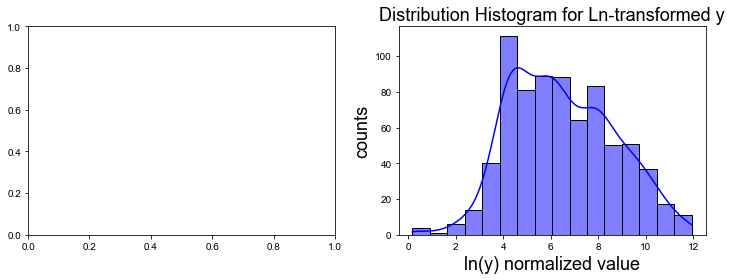

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# y_log = np.exp(Y_all)

# 设置字体为Arial
plt.rcParams['font.family'] = 'Arial'

# 创建一个2x1的子图
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制原始y的分布直方图
# sns.histplot(y_log, kde=True, color='blue', ax=axes[0])
# axes[0].set_xlabel('y value', fontsize=18)  # 设置x轴标签的字体大小为16
# axes[0].set_ylabel('counts', fontsize=18)   # 设置y轴标签的字体大小为16
# # axes[0].set_title('Distribution Histogram for Original y', fontsize=18)  # 设置标题的字体大小为18

# 对y进行对数变换
# y_log = np.log(Y_all)


# # 绘制对数变换后y的分布直方图
sns.histplot(Y_all, kde=True, color='blue', ax=axes[1])
axes[1].set_xlabel('ln(y) normalized value', fontsize=18)  # 设置x轴标签的字体大小为16
axes[1].set_ylabel('counts', fontsize=18)  # 设置y轴标签的字体大小为16
axes[1].set_title('Distribution Histogram for Ln-transformed y', fontsize=18)  # 设置标题的字体大小为18

# 设置坐标轴刻度字体大小
for ax in axes:
    ax.tick_params(axis='both', labelsize=10)  # 设置刻度标签的字体大小为14

plt.tight_layout()  # 调整子图布局以防止重叠
plt.show()


In [18]:
drop_num = 0

# iter_num = 25
# init_sample = 50
# batch_size = 10

iter_num = 20
init_sample = 20
batch_size = 1

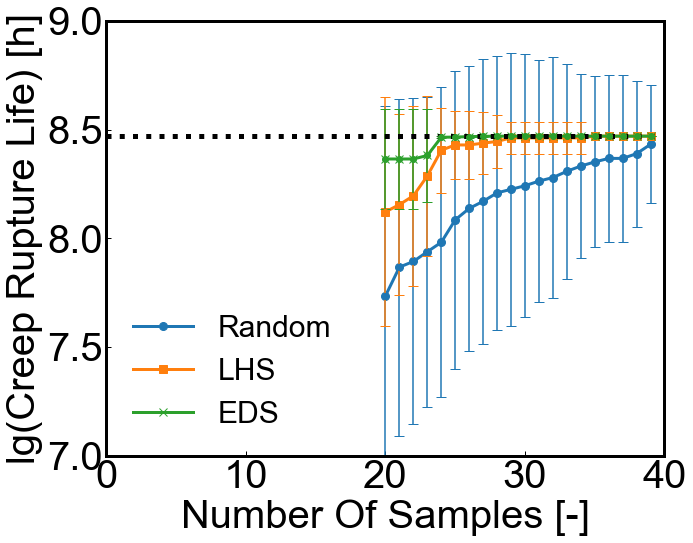

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import os


# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1\miny' 
# datasets = [ 'RDM50_EI100',   'LHS50_EI100',  'SE50_EI100' ,  ]



# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1\original\miny' 
# datasets = [ 'RDM50_EI300',   'LHS50_EI300',  'SE50_EI300_cor' ,  ] 

folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s2\original\miny\20+20' 
# # datasets = [ 'RDM15_EI25',   'LHS15_EI25',  'SE15_EI25' ,  ]
datasets = [ 'RDM20_EI20',   'LHS20_EI20',  'SE20_EI20' ,  ]
    
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\ti\original_data\miny'
# datasets = [ 'RDM10_EI60',   'LHS10_EI60',  'LHS3_SE7_EI60' ,  ]

# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\ti\virtual_data\miny'
# datasets = [ 'RDM20_EI30',   'LHS20_EI30',  'LHS3_SE17_EI30' ,  ]
#   Goldstein\predict   Alloy\s2_data  s1+s2


eval_types = ['miny'] #  regret  Spearman  Edis  miny
# datasets = ['RDM20_EI30',   'LHS20_EI30',  'LHS3_SE17_EI30' ,   ]
# datasets = [ 'RDM50_EI100',    'SE50_EI100' , 'LHS50_EI100',  ]

color_sets =  [ 'red',  'orange',  'blue' ,]
# 'RDM25_EI20',   'LHS25_EI20',  'LHS3_SE22_EI20' ,   

# label_sets =   datasets
label_sets =    [ 'Random',  'LHS',  'EDS' , ] 

fig = plt.figure(figsize=(10, 8))

fontsize = 40

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for eval_type in eval_types:
    mean_datasets = []
    std_datasets  = []
    # 循环导入每个数据集
    for dataset in datasets:
        # 从 Excel 文件中读取数据
        file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
        
        df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
        
#         df = np.exp(-df)  #转化为原始尺度
        
        df = -df
        

        last_column = df.columns[-1]
        max_indices = df[last_column].nlargest(drop_num).index
        min_indices = df[last_column].nsmallest(drop_num).index
        df = df.drop(max_indices)
        df.reset_index(drop=True, inplace=True)
        df = df.drop(min_indices)
        df.reset_index(drop=True, inplace=True)
        
        

        # 计算均值并存储到列表中
        mean_data = df.mean()
        mean_datasets.append(mean_data) 
        
        std_data = df.std()
        std_datasets.append(std_data)        

    # 绘制每个数据集的均值曲线
    for i, dataset in enumerate(label_sets):
        
        x_values = np.arange(0, len(mean_datasets[i])) * batch_size + init_sample
#         x_values = np.arange(0, 66,5)
        
            
        marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
        line_styles = ['-', '-', '-', '-', '-', '-', '-']
        line, = plt.plot( x_values, mean_datasets[i], label=dataset, marker=marker_styles[i], markersize=8,
                         linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )]) # i  ( 4 - i )

        # 设置每隔五个点标记一次，并标记最后一个点
        markers_num = list(range(0, len(mean_datasets[i]), 1)) 
        plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                     fmt='o', capsize=5,color=line.get_color())


plt.axhline(y_min, color='black', linestyle=':', linewidth=5)
        
        
# 添加标题和坐标轴标签
# plt.title('Evaluation Comparison', fontsize=20)

# plt.axhline(y_min, color='black', linestyle=':', linewidth=5,)

plt.xlim(0, iter_num *batch_size  + init_sample )
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

# plt.gca().set_yticks(np.arange(7, 9.1, 0.5))
# plt.ylim(10.5, 12.0) # (-1, 4)
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))

plt.ylim(7, 9) # (-1, 4)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
plt.ylabel('lg(Creep Rupture Life) [h]', fontsize=fontsize)
plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize , grid_alpha=0.5)


legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

plt.show()

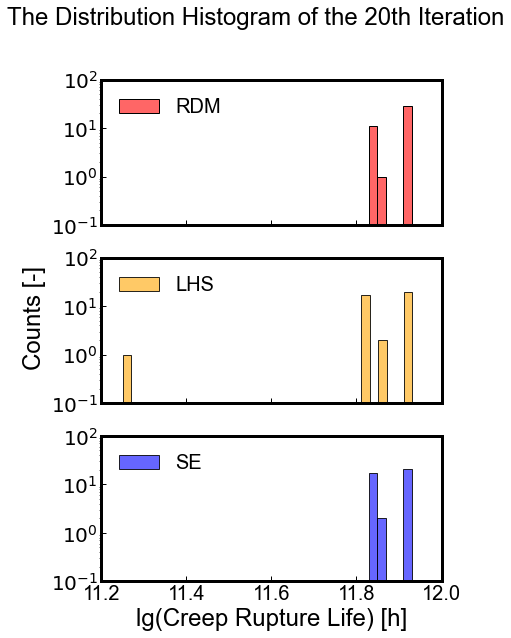

In [9]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

eval_num = 19

fig, axs = plt.subplots(len(datasets), 1, figsize=(6, 9), sharex=True)
fontsize = 20

# 获取默认颜色循环
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, dataset in enumerate(datasets):
    # 从 Excel 文件中读取数据
    file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx') 
    df = pd.read_excel(file_path, header=0)
            
    
#     df = np.exp(-df)  #转化为原始尺度
    df = -df
    
        # 找到最后一列的列名,删除最大最小行
    last_column = df.columns[-1]
    max_indices = df[last_column].nlargest(drop_num).index
    min_indices = df[last_column].nsmallest(drop_num).index
    df = df.drop(max_indices)
    df = df.drop(min_indices)
    df.reset_index(drop=True, inplace=True)
        
    data_column = df.iloc[:, eval_num]
    
    # 绘制直方图到对应的子图上
    hist_plot = sns.histplot(data_column, color=color_sets[i], kde=False,  # i  ( 4 - i )
                 alpha=0.6,  binwidth=0.02,ax=axs[i],label=f'{label_sets[i]}',log_scale=(False, True)) #   binwidth=0.01, log_scale=(False, True) 
    
# 设置x轴的范围和刻度间隔 
# 设置x轴的范围
    axs[i].set_xlim(11.2, 12.0)
    x_ticks = np.arange(11.2, 12.0, 0.2)  # 设置刻度间隔为10
    axs[i].set_xticks(x_ticks)  
# 设置y轴的范围和刻度间隔
#     y_max = 40 # 设置y轴的最大值
#     y_ticks = np.arange(0, y_max + 1, 10)  # 设置刻度间隔为10
#     axs[i].set_yticks(y_ticks)
#     axs[i].tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)
    
    y_ticks = [10**i for i in range(-1, int(np.log10(100)) + 1)]
    axs[i].set_yticks(y_ticks)
    
    # 设置y轴标签为科学计数法形式
    def log_format_func(value, tick_number):
        return f'$10^{{{int(np.log10(value))}}}$' if value > 0 else '0'
    axs[i].get_yaxis().set_major_formatter(FuncFormatter(log_format_func)) 
    
    axs[i].tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)
    
    
# 调整所有子图的框线宽度
    for spine in axs[i].spines.values():
        spine.set_linewidth(3) 
    
    # 去除子图的 ylabel
    axs[i].set_ylabel('')
    legend = axs[i].legend(loc='upper left', fontsize=fontsize,frameon=False)
    plt.setp(legend.get_texts(), fontname='Arial')
    
    
# 设置公共的x轴标签

# plt.ylabel('lg(Creep Rupture Life) [h]', fontsize=fontsize*1.2)
plt.xlabel('lg(Creep Rupture Life) [h]', fontsize=fontsize*1.2)
fig.text(-0.04, 0.5, 'Counts [-]', va='center', rotation='vertical', fontsize=fontsize*1.2)
# 添加总体标题
plt.suptitle(f'The Distribution Histogram of the {eval_num+1}th Iteration', fontsize=fontsize*1.2)

# 添加网格线
# plt.grid(True)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()


# 模型评估画图

In [1]:
drop_num = 0
iter_num = 30
init_sample = 3
batch_size = 2

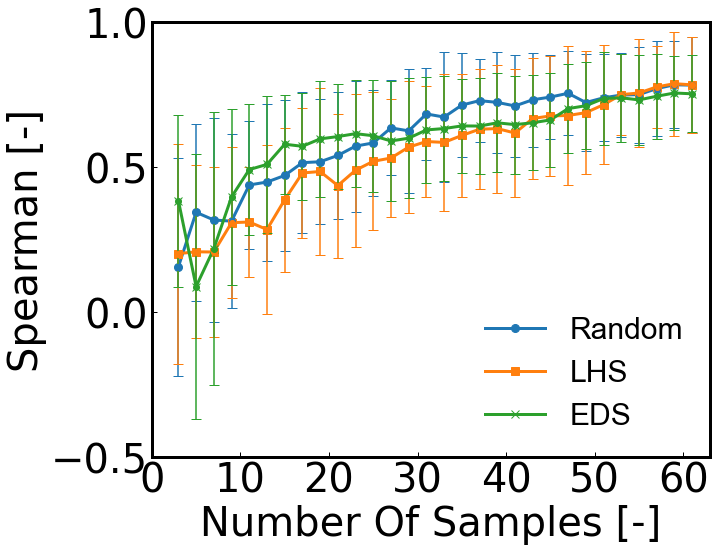

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import os


# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1\predict'  #  original_data virtual_data
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1\original\predict'
folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s2\original\predict'
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\ti\original_data\predict'  #  original_data virtual_data
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\ti\virtual_data\predict'  #  original_data virtual_data
#  virtual_data s1+s2 s1

eval_types = ['Spearman'] #  regret  Spearman  Edis  miny
datasets = ['RDM',  'LHS',  'SE' , ]
# datasets = ['RDM',  'LHS',  'SE_cor' , ]


# label_sets =   datasets
label_sets =    [ 'Random',  'LHS',  'EDS' , ] 

fig = plt.figure(figsize=(10, 8))

fontsize = 40

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for eval_type in eval_types:
    mean_datasets = []
    std_datasets  = []
    # 循环导入每个数据集
    for dataset in datasets:
        # 从 Excel 文件中读取数据
        file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
        
        df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
        

        # 计算均值并存储到列表中
        mean_data = df.mean()
        mean_datasets.append(mean_data) 
        
        std_data = df.std()
        std_datasets.append(std_data)        

    # 绘制每个数据集的均值曲线
    for i, dataset in enumerate(label_sets):
        
        x_values = np.arange(0, len(mean_datasets[i])) * batch_size + init_sample
#         x_values = np.arange(0, 66,5)
        
        # 设置每隔五个点标记一次，并标记最后一个点
        markers_num = list(range(0, len(mean_datasets[i]), 1)) 
        
        marker_styles = ['o', 's', 'x', 'v', '^', 'D', 'P']
        line_styles = ['-', '-', '-', '-', '-', '-', '-']
#         line, = plt.plot( x_values, mean_datasets[i], label=dataset, marker=marker_styles[i], markersize=8,
#                          linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i ).
        
        line, = plt.plot( x_values[markers_num], mean_datasets[i][markers_num], label=dataset, marker=marker_styles[i], markersize=8,
                 linestyle=line_styles[i] ,linewidth= 3 ,color=default_colors[  i  % len(default_colors )])  # i  ( 4 - i )


        plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                     fmt='o', capsize=5,color=line.get_color())


        
        
# 添加标题和坐标轴标签
# plt.title('Evaluation Comparison', fontsize=20)


plt.xlim(0, iter_num *batch_size  + init_sample )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(batch_size*5))

# plt.ylim(-0.2,0.6) # (-1, 4)
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

plt.ylim(-0.5, 1) # (-1, 4)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
# plt.gca().set_yticks(np.arange(-0.2, 1.1, 0.3))

# 设置x轴刻度标签的字体大小
plt.xticks(fontsize=fontsize)
# 设置y轴刻度标签的字体大小
plt.yticks(fontsize=fontsize)

plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
# plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Spearman [-]', fontsize=fontsize)

# 调整坐标轴参数
plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)

# 显示网格
# plt.grid(True)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3
# 自动调整坐标轴范围
# plt.autoscale()
# 显示图形
plt.show()

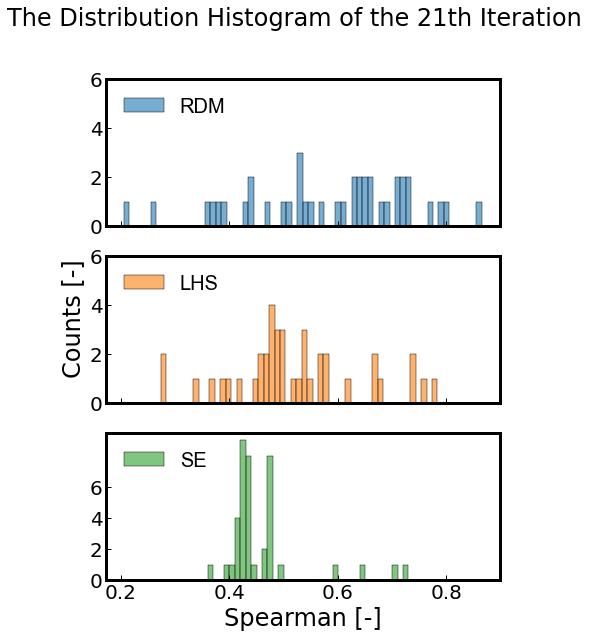

In [9]:
import seaborn as sns


eval_num = 20

fig, axs = plt.subplots(len(datasets), 1, figsize=(6, 9), sharex=True)
fontsize = 20

# 获取默认颜色循环
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, dataset in enumerate(datasets):
    # 从 Excel 文件中读取数据
    file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx') 
    df = pd.read_excel(file_path, header=0)
    
        # 找到最后一列的列名,删除最大最小行
    last_column = df.columns[-1]
    max_indices = df[last_column].nlargest(drop_num).index
    min_indices = df[last_column].nsmallest(drop_num).index
    df = df.drop(max_indices)
    df = df.drop(min_indices)
    df.reset_index(drop=True, inplace=True)
        
    data_column = df.iloc[:, eval_num]
    
    # 绘制直方图到对应的子图上
    hist_plot = sns.histplot(data_column, color=default_colors[ i  % len(default_colors)], kde=False,  # i  ( 4 - i )
                 alpha=0.6, binwidth=0.01, ax=axs[i],label=f'{label_sets[i]}', ) #   binwidth=0.01, log_scale=(False, True) 
    
# 设置x轴的范围和刻度间隔 
# 设置x轴的范围
#     axs[i].set_xlim(0.45, 1.05)
#     x_ticks = np.arange(0.5,1.05, 0.1)  # 设置刻度间隔为10
#     axs[i].set_xticks(x_ticks)  
# 设置y轴的范围和刻度间隔
    y_max = 6 # 设置y轴的最大值
    y_ticks = np.arange(0, y_max + 1, 2)  # 设置刻度间隔为10
    axs[i].set_yticks(y_ticks)
    axs[i].tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.5)
    
# 调整所有子图的框线宽度
    for spine in axs[i].spines.values():
        spine.set_linewidth(3) 
    
    # 去除子图的 ylabel
    axs[i].set_ylabel('')
    legend = axs[i].legend(loc='upper left', fontsize=fontsize,frameon=False)
    plt.setp(legend.get_texts(), fontname='Arial')
    
    
# 设置公共的x轴标签
plt.xlabel('Spearman [-]', fontsize=fontsize*1.2)  # Regret  Spearman
fig.text(-0.04, 0.5, 'Counts [-]', va='center', rotation='vertical', fontsize=fontsize*1.2)
# 添加总体标题
plt.suptitle(f'The Distribution Histogram of the {eval_num+1}th Iteration', fontsize=fontsize*1.2)



# 添加网格线
# plt.grid(True)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()
